## UVLT Heatmaps - Annual Donations Over Time, By Town
##### Sonia Rowley, JAMRS



In [1]:
#Imported relevant and necessary libraries and data cleaning tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hypertools as hyp
import plotly_express as px #plotly express is a library for drawing interactive figures
from glob import glob as lsdir
import os
import re
import datetime as dt

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [2]:
#Code from Professor Manning to set up and read in the relevant UVLT data 
data_readers = {'xlsx': pd.read_excel, 'xls': pd.read_excel, 'dta': pd.read_stata}
get_extension = lambda x: x.split('.')[-1]


def read_data(datadir, readers):
    files = lsdir(os.path.join('..', datadir, '*'))
    readable_files = []
    data = []
    for f in files:
        ext = get_extension(f)
        if ext in readers.keys():
            readable_files.append(f)
            data.append(data_readers[ext](f))
    return readable_files, data


fnames, data = read_data('data', data_readers)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
#A summary of the data files that are now read into the notebook
fnames

['../data/UVLTdata_individual.dta',
 '../data/UVLTdata_final.dta',
 '../data/Direct Mailing Analysis.xlsx',
 '../data/UVLTDataAnalysis.xls',
 '../data/TownLevelData.xlsx',
 '../data/TownLevelData.dta',
 '../data/CensusInfoUpperValley2015JH.xlsx']

In [4]:
#Renaming relevant columns in UVLT individual data to be more easily readable
names={'DeceasedDateYN' : 'DeceasedYN',
       'U_Tot_Amt': 'Total Unrestricted Donations',
      'U_Tot_Cnt': 'Total # Unrestricted Donations',
      'ConservedOwner' : 'Owns Conserved Land?',
      'RTotAmt' : 'Total Restricted Donations',
        'RTotCnt': 'Total # Restricted Donations',
      'VTotCnt' : 'Total Volunteer Occurances',
      'ETotCnt' : 'Total Event Attendances'}
data[1].rename(names, inplace=True, axis=1)

In [5]:
#copying each set of data into more memorably named versions
final_data=data[1].copy()

In [6]:
pd.set_option('display.max_columns', 500)
final_data.head()

,ContactID,State,TownID,Town,LandOwnerTownID,DeceasedYN,Total Unrestricted Donations,Total # Unrestricted Donations,U200001,U200102,U200203,U200304,U200405,U200506,U200607,U200708,U200809,U200910,U201011,U201112,U201213,U201314,U201415,U201516,U201617,U201718,U201819,Total Restricted Donations,Total # Restricted Donations,R200001,R200102,R200203,R200304,R200405,R200506,R200607,R200708,R200809,R200910,R201011,R201112,R201213,R201314,R201415,R201516,R201617,R201718,R201819,Total Volunteer Occurances,V200001,V200102,V200203,V200304,V200405,V200506,V200607,V200708,V200809,V200910,V201011,V201112,V201213,V201314,V201415,V201516,V201617,V201718,V201819,Total Event Attendances,E200001,E200102,E200203,E200304,E200405,E200506,E200607,E200708,E200809,E200910,E201011,E201112,E201213,E201314,E201415,E201516,E201617,E201718,E201819,DeceasedDate,Owns Conserved Land?,Nprojects,Nacres,Nmembers,MedianHHIncome,MeanHHIncome,PercBAplus,PercAge55Plus
0,2903.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
1,11472.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
2,9206.0,VT,2.0,Bradford,0.0,0.0,75.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
3,12910.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306
4,5029.0,VT,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,20.0,2258.32,7.0,48056.0,58716.0,30.6,32.912306


In [7]:
UR_year_data = final_data.loc[:,'TownID':'U201819']
UR_year_data = UR_year_data.drop('LandOwnerTownID', axis = 1)
UR_year_data = UR_year_data.drop('DeceasedYN', axis = 1)
UR_year_data.head()

,TownID,Town,Total Unrestricted Donations,Total # Unrestricted Donations,U200001,U200102,U200203,U200304,U200405,U200506,U200607,U200708,U200809,U200910,U201011,U201112,U201213,U201314,U201415,U201516,U201617,U201718,U201819
0,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Bradford,75.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,Bradford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
UR_town_year1 = UR_year_data.groupby('Town').aggregate(np.sum)
UR_town_year = UR_town_year1.drop(['TownID', 'Total Unrestricted Donations', 'Total # Unrestricted Donations'], axis = 1)
UR_town_year.head()

,U200001,U200102,U200203,U200304,U200405,U200506,U200607,U200708,U200809,U200910,U201011,U201112,U201213,U201314,U201415,U201516,U201617,U201718,U201819
Town,,,,,,,,,,,,,,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
All Other Towns,18389.40,16366.38,30421.22,55929.95,46587.15,47273.95,53062.11,55740.43,34371.21,60858.74,16954.39,24992.1,16309.1,23085.01,15712.04,16247.27,16041.05,20087.91,8441.0
All Other Towns CT,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,1225.00,2200.00,1260.00,2600.00,7150.0,3125.0,3550.00,6750.00,8900.00,9750.00,9500.00,2300.0
All Other Towns MA,6530.00,6255.00,48075.00,14790.48,17903.01,19202.21,28582.70,58627.42,19528.00,49189.89,41835.01,47688.0,35579.6,44753.40,51405.10,24428.00,25934.41,41506.08,14500.0
All Other Towns ME,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,1040.00,760.00,625.00,425.00,85.0,250.0,325.00,375.00,555.00,425.00,580.00,1000.0


In [9]:
names = {'U200001' : '2000-01',
        'U200102' : '2001-02',
        'U200203' : '2002-03',
        'U200304' : '2003-04',
        'U200405' : '2004-05',
        'U200506' : '2005-06',
        'U200607' : '2006-07',
        'U200708' : '2007-08',
        'U200809' : '2008-09',
        'U200910' : '2009-10',
        'U201011' : '2010-11',
        'U201112' : '2011-12',
        'U201213' : '2012-13',
        'U201314' : '2013-14',
        'U201415' : '2014-15',
        'U201516' : '2015-16',
        'U201617' : '2016-17',
        'U201718' : '2017-18',
        'U201819' : '2018-19'}
town_names = {'All Other Towns' : 'All Other',
             'All Other Towns CT' : 'Other CT',
             'All Other Towns MA' : 'Other MA',
             'All Other Towns ME' : 'Other ME',
             'All Other Towns NH' : 'Other NH',
             'All Other Towns VT' : 'Other VT'}

UR_town_year.rename(names, inplace=True, axis=1)
UR_town_year.rename(town_names, inplace=True, axis=0)
UR_town_year.head(50)

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
All Other,18389.40,16366.38,30421.22,55929.95,46587.15,47273.95,53062.11,55740.43,34371.21,60858.74,16954.39,24992.10,16309.10,23085.01,15712.04,16247.27,16041.05,20087.91,8441.00
Other CT,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,1225.00,2200.00,1260.00,2600.00,7150.00,3125.00,3550.00,6750.00,8900.00,9750.00,9500.00,2300.00
Other MA,6530.00,6255.00,48075.00,14790.48,17903.01,19202.21,28582.70,58627.42,19528.00,49189.89,41835.01,47688.00,35579.60,44753.40,51405.10,24428.00,25934.41,41506.08,14500.00
Other ME,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,1040.00,760.00,625.00,425.00,85.00,250.00,325.00,375.00,555.00,425.00,580.00,1000.00
Other NH,2235.00,2791.57,2178.05,3363.00,9066.00,8775.00,6605.00,3525.00,3796.00,3500.00,3640.00,2775.00,3605.00,2270.00,2520.00,3345.00,3775.00,3947.00,1260.00
Other VT,2730.00,3165.00,4720.00,36260.00,34360.00,3304.25,67235.00,35355.00,40410.00,32340.00,29250.00,33635.00,21625.00,79560.37,27760.06,67775.75,48730.45,51425.00,1842.86
Bath,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bradford,305.00,275.00,600.00,175.00,760.00,385.00,375.00,225.00,185.00,175.00,425.00,250.00,350.00,325.00,200.00,475.00,325.00,425.00,150.00


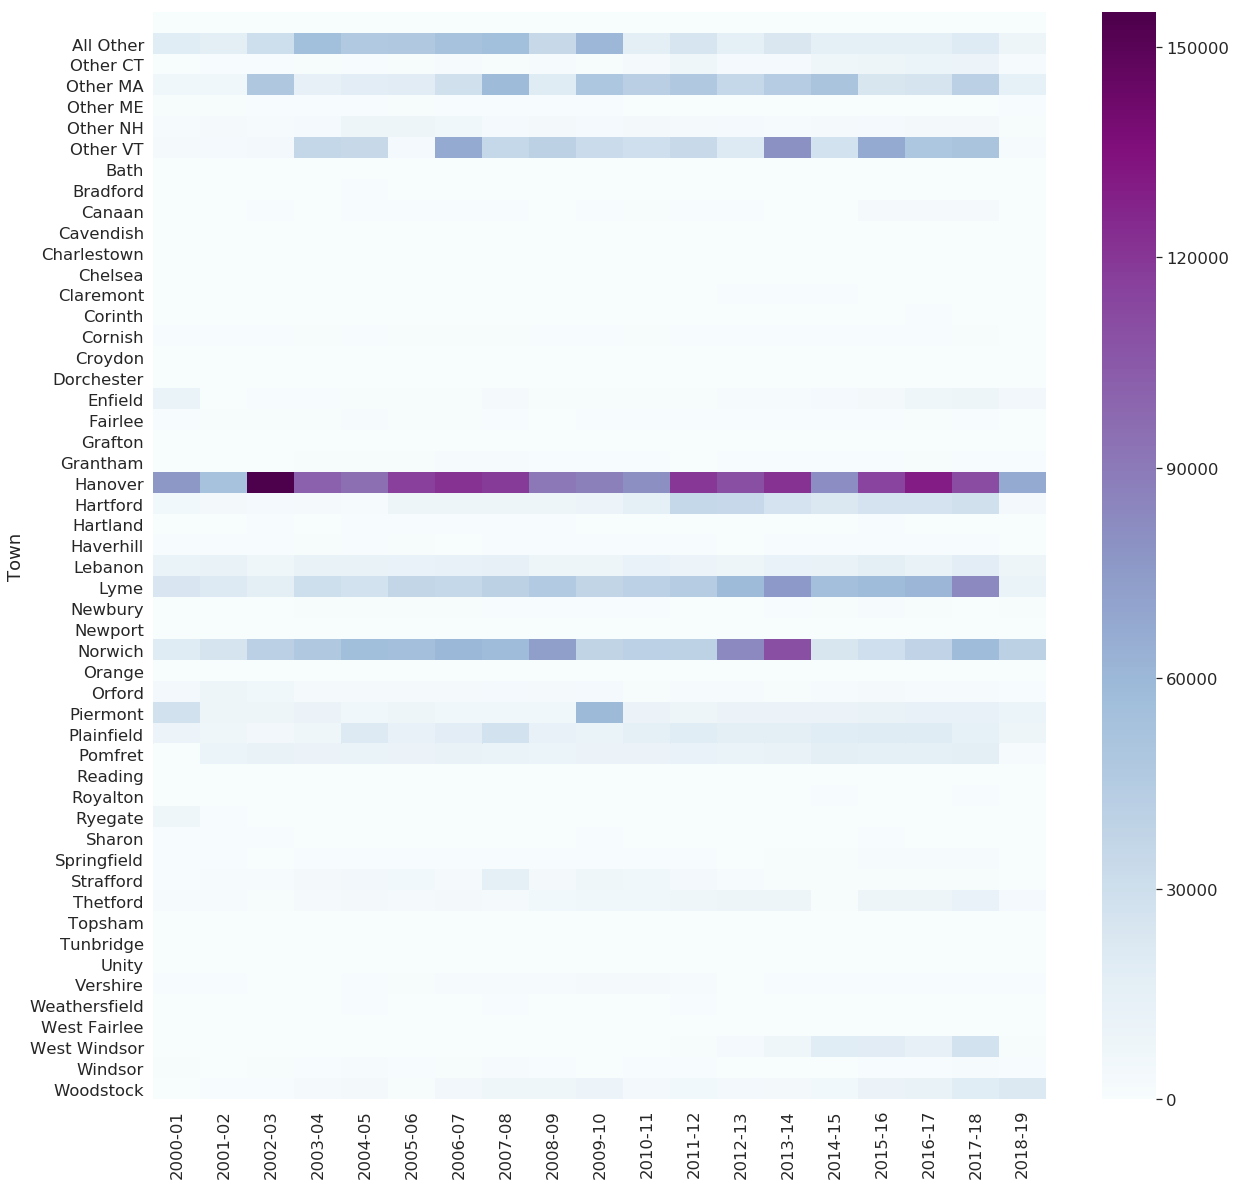

In [31]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(UR_town_year, cmap = 'BuPu')

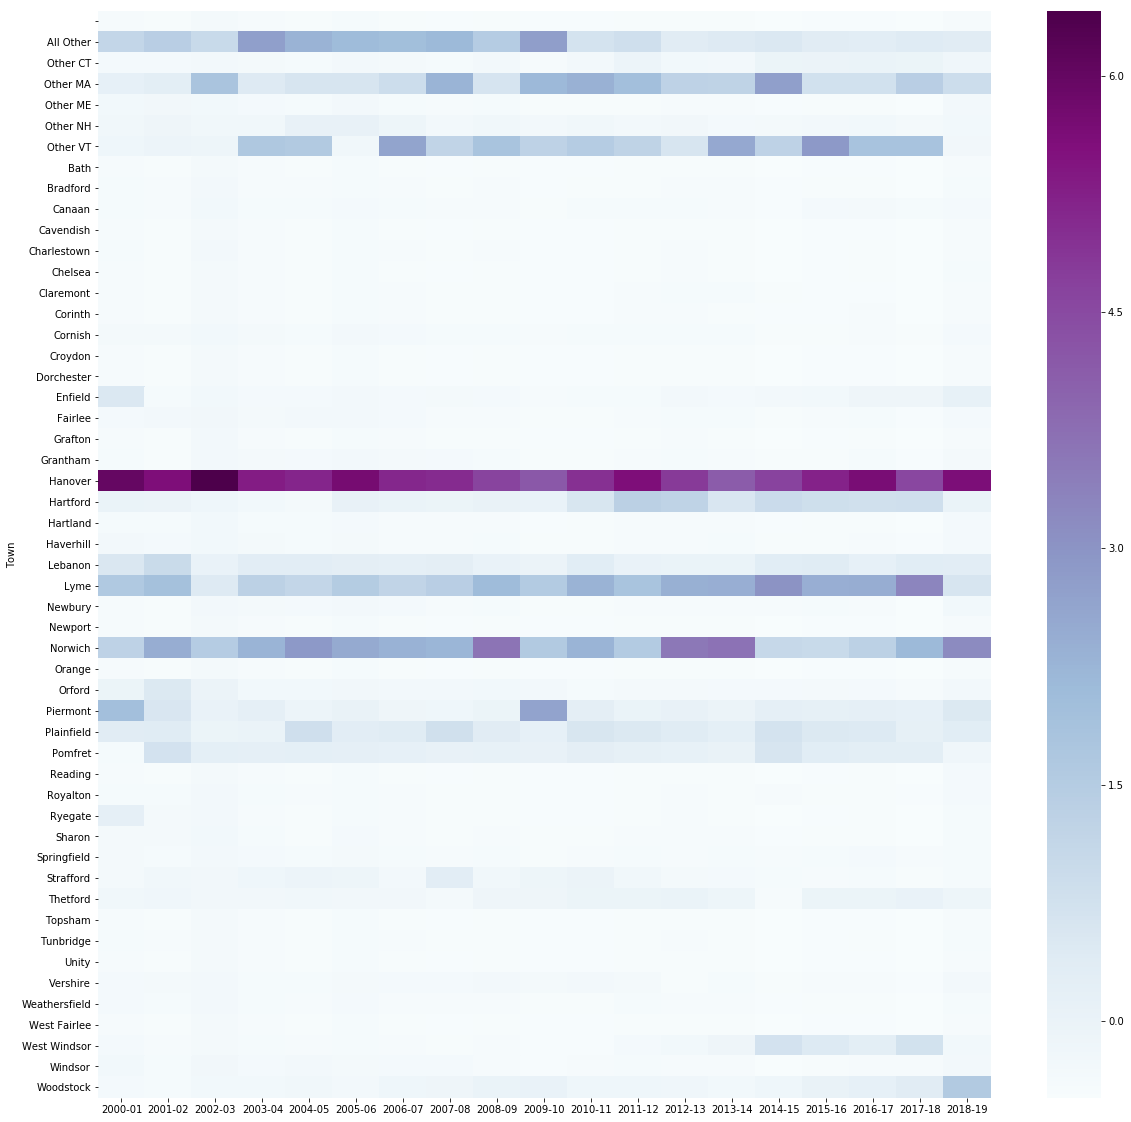

In [11]:
# trying 'normalization'
# source: https://python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap/-
plt.figure(figsize=(20,20))
town_year_norm = (UR_town_year - UR_town_year.mean())/UR_town_year.std()
sns.heatmap(town_year_norm, cmap = 'BuPu')

In [12]:
# trying to make the range smaller by removing Hanover
UR_without_big = UR_town_year.drop(['Hanover','Norwich','Lyme', 'All Other'], axis=0)

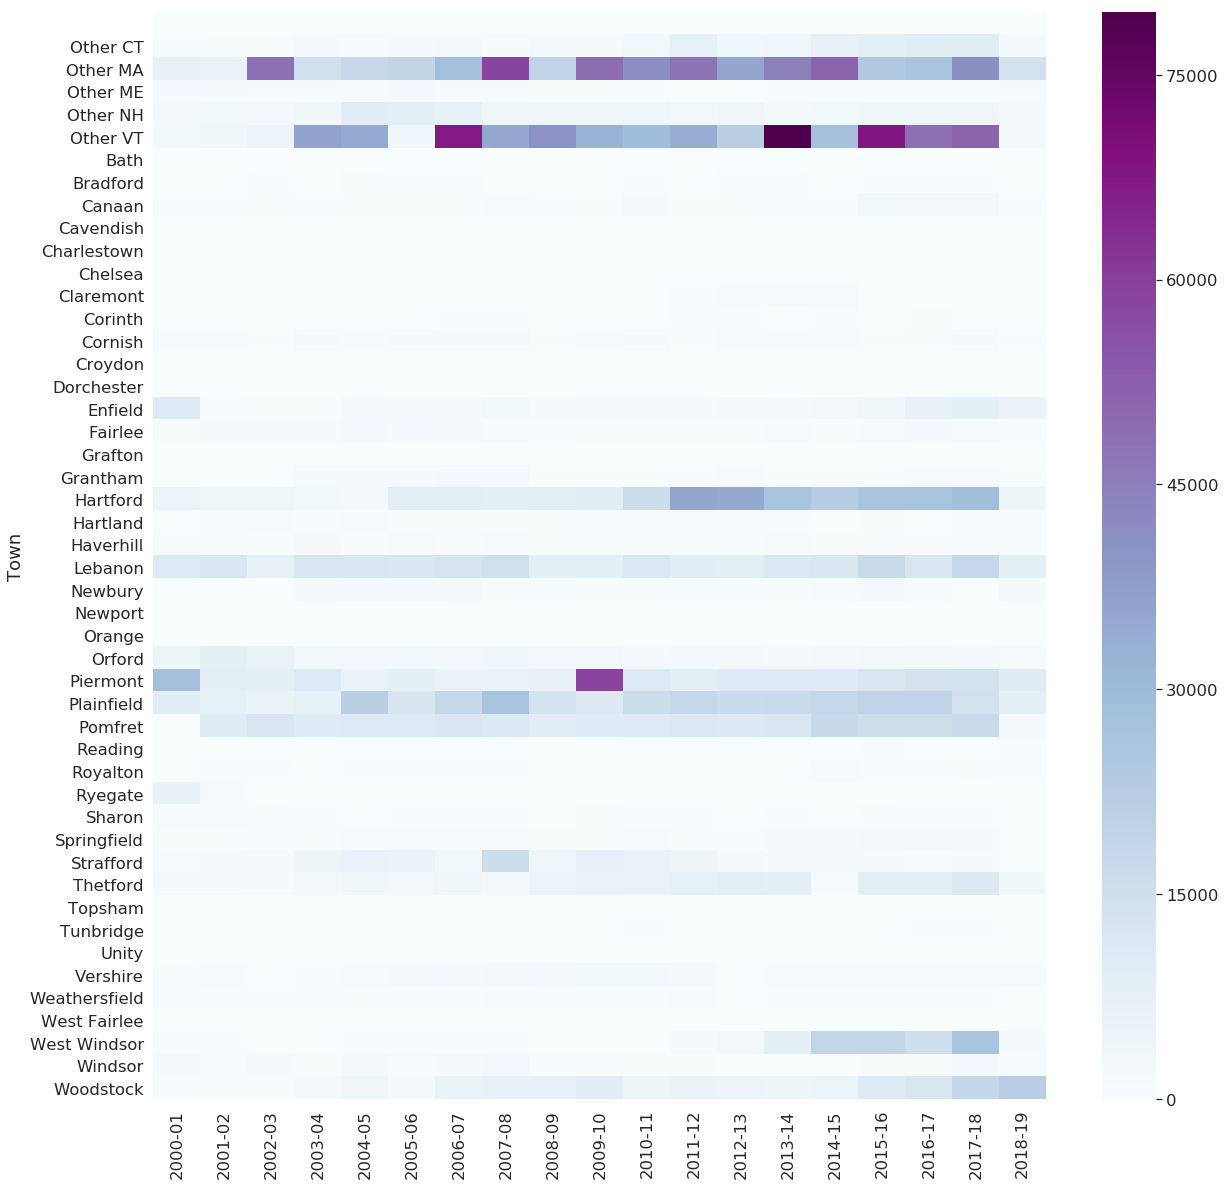

In [30]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(UR_without_big, cmap = 'BuPu')

In [14]:
# trying to divide it into two heatmaps so that the range is smaller
UR_town_year.sort_values

<bound method DataFrame.sort_values of                 2000-01   2001-02    2002-03    2003-04   2004-05    2005-06  \
Town                                                                           
                   0.00      0.00       0.00       0.00      0.00       0.00   
All Other      18389.40  16366.38   30421.22   55929.95  46587.15   47273.95   
Other CT         600.00    840.00     635.00    1365.00   1190.00    1710.00   
Other MA        6530.00   6255.00   48075.00   14790.48  17903.01   19202.21   
Other ME        1619.28   1683.29    1125.00    1100.00   1205.00    1600.00   
Other NH        2235.00   2791.57    2178.05    3363.00   9066.00    8775.00   
Other VT        2730.00   3165.00    4720.00   36260.00  34360.00    3304.25   
Bath               0.00      0.00       0.00       0.00      0.00       0.00   
Bradford         305.00    275.00     600.00     175.00    760.00     385.00   
Canaan           345.00    425.00     845.00     555.00    780.00     770.00   
C

In [15]:
UR_town_year1.head()

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,U200001,U200102,U200203,U200304,U200405,U200506,U200607,U200708,U200809,U200910,U201011,U201112,U201213,U201314,U201415,U201516,U201617,U201718,U201819
Town,,,,,,,,,,,,,,,,,,,,,,
,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
All Other Towns,95400.0,576870.41,1223.0,18389.40,16366.38,30421.22,55929.95,46587.15,47273.95,53062.11,55740.43,34371.21,60858.74,16954.39,24992.1,16309.1,23085.01,15712.04,16247.27,16041.05,20087.91,8441.0
All Other Towns CT,9664.0,66775.00,163.0,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,1225.00,2200.00,1260.00,2600.00,7150.0,3125.0,3550.00,6750.00,8900.00,9750.00,9500.00,2300.0
All Other Towns MA,29574.0,596313.31,604.0,6530.00,6255.00,48075.00,14790.48,17903.01,19202.21,28582.70,58627.42,19528.00,49189.89,41835.01,47688.0,35579.6,44753.40,51405.10,24428.00,25934.41,41506.08,14500.0
All Other Towns ME,3575.0,15917.57,107.0,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,1040.00,760.00,625.00,425.00,85.0,250.0,325.00,375.00,555.00,425.00,580.00,1000.0


In [16]:
names = {'U200001' : '2000-01',
        'U200102' : '2001-02',
        'U200203' : '2002-03',
        'U200304' : '2003-04',
        'U200405' : '2004-05',
        'U200506' : '2005-06',
        'U200607' : '2006-07',
        'U200708' : '2007-08',
        'U200809' : '2008-09',
        'U200910' : '2009-10',
        'U201011' : '2010-11',
        'U201112' : '2011-12',
        'U201213' : '2012-13',
        'U201314' : '2013-14',
        'U201415' : '2014-15',
        'U201516' : '2015-16',
        'U201617' : '2016-17',
        'U201718' : '2017-18',
        'U201819' : '2018-19'}
town_names = {'All Other Towns' : 'All Other',
             'All Other Towns CT' : 'Other CT',
             'All Other Towns MA' : 'Other MA',
             'All Other Towns ME' : 'Other ME',
             'All Other Towns NH' : 'Other NH',
             'All Other Towns VT' : 'Other VT'}

UR_town_year1.rename(names, inplace=True, axis=1)
UR_town_year1.rename(town_names, inplace=True, axis=0)
UR_town_year1.head(50)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,,
,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
All Other,95400.0,576870.41,1223.0,18389.40,16366.38,30421.22,55929.95,46587.15,47273.95,53062.11,55740.43,34371.21,60858.74,16954.39,24992.10,16309.10,23085.01,15712.04,16247.27,16041.05,20087.91,8441.00
Other CT,9664.0,66775.00,163.0,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,1225.00,2200.00,1260.00,2600.00,7150.00,3125.00,3550.00,6750.00,8900.00,9750.00,9500.00,2300.00
Other MA,29574.0,596313.31,604.0,6530.00,6255.00,48075.00,14790.48,17903.01,19202.21,28582.70,58627.42,19528.00,49189.89,41835.01,47688.00,35579.60,44753.40,51405.10,24428.00,25934.41,41506.08,14500.00
Other ME,3575.0,15917.57,107.0,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,1040.00,760.00,625.00,425.00,85.00,250.00,325.00,375.00,555.00,425.00,580.00,1000.00
Other NH,46177.0,72971.62,408.0,2235.00,2791.57,2178.05,3363.00,9066.00,8775.00,6605.00,3525.00,3796.00,3500.00,3640.00,2775.00,3605.00,2270.00,2520.00,3345.00,3775.00,3947.00,1260.00
Other VT,31878.0,621483.74,364.0,2730.00,3165.00,4720.00,36260.00,34360.00,3304.25,67235.00,35355.00,40410.00,32340.00,29250.00,33635.00,21625.00,79560.37,27760.06,67775.75,48730.45,51425.00,1842.86
Bath,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bradford,280.0,6385.00,123.0,305.00,275.00,600.00,175.00,760.00,385.00,375.00,225.00,185.00,175.00,425.00,250.00,350.00,325.00,200.00,475.00,325.00,425.00,150.00


In [17]:
UR_towns_sorted = UR_town_year1.sort_values(by=['Total # Unrestricted Donations'])

In [21]:
UR_towns_sorted.head(53)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,,
,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Newport,23.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dorchester,11.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Orange,25.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cavendish,4.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bath,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Croydon,10.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
West Fairlee,1554.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Unity,39.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [22]:
bottom_half_towns = UR_towns_sorted.loc['Newport':'Piermont',:]
bottom_half_towns.head(30)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,,
Newport,23.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Dorchester,11.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Orange,25.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Cavendish,4.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Bath,1.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Croydon,10.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
West Fairlee,1554.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Unity,39.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Topsham,1036.0,250.00,1.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,250.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0


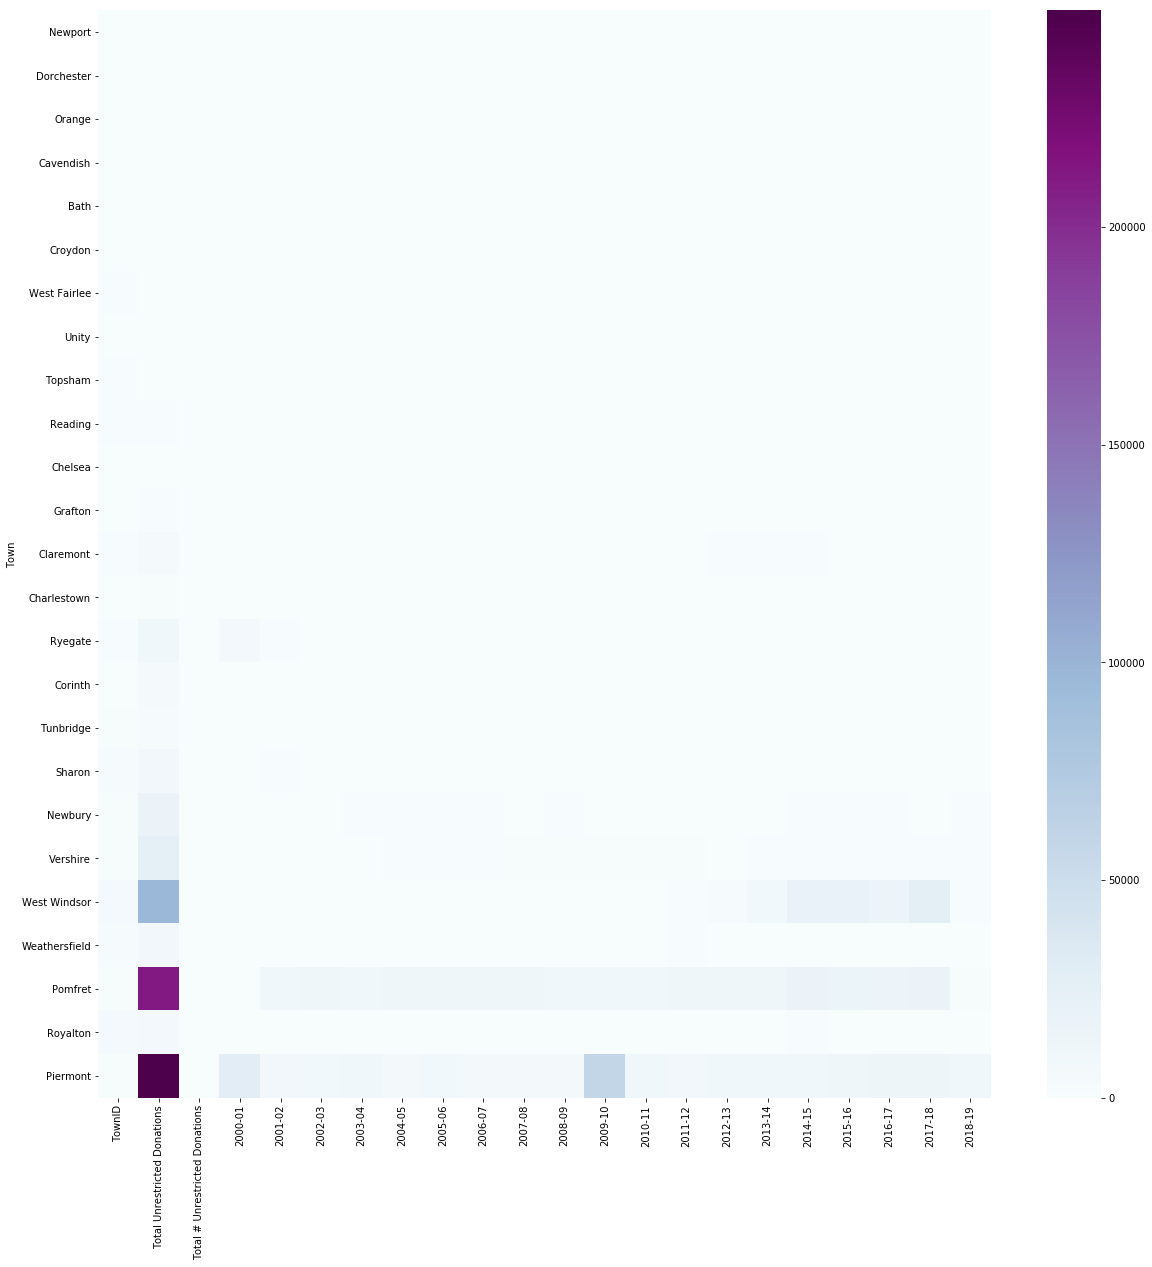

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(bottom_half_towns, cmap = 'BuPu')

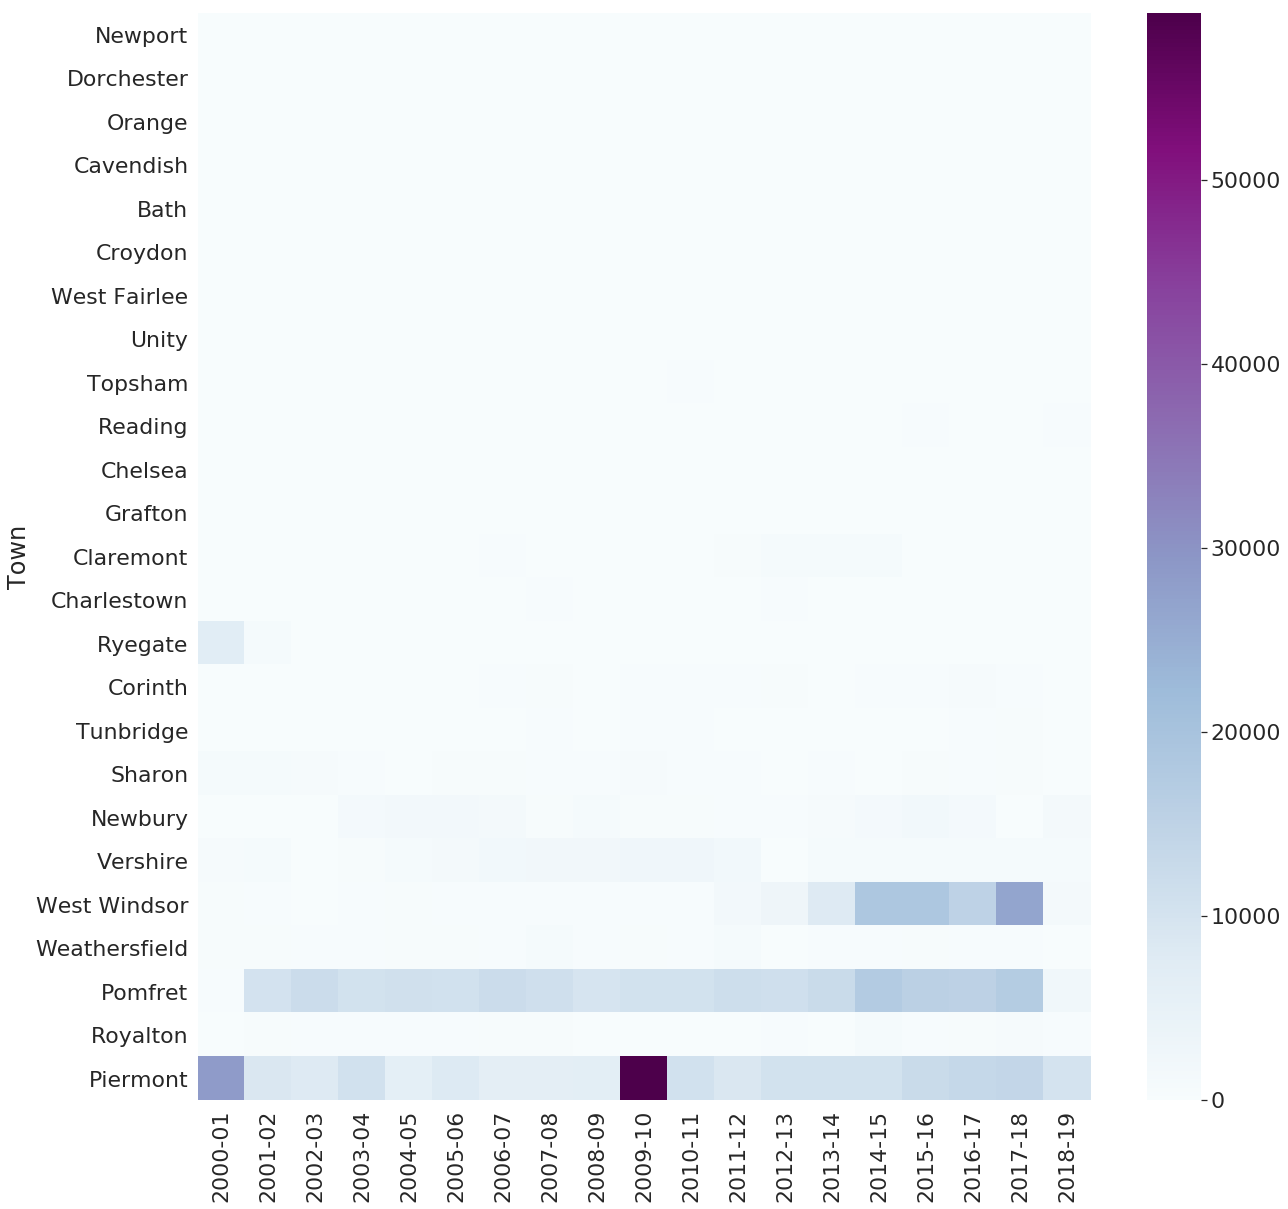

In [25]:
REAL_bottom_half = bottom_half_towns.drop(['TownID','Total Unrestricted Donations','Total # Unrestricted Donations'], axis = 1)
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(REAL_bottom_half, cmap = 'BuPu')

In [26]:
top_half_towns = UR_towns_sorted.loc['Other ME':'Hanover',:]
top_half_towns.head(30)

,TownID,Total Unrestricted Donations,Total # Unrestricted Donations,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
Town,,,,,,,,,,,,,,,,,,,,,,
Other ME,3575.0,15917.57,107.0,1619.28,1683.29,1125.00,1100.00,1205.00,1600.00,1140.00,1040.00,760.00,625.00,425.00,85.00,250.00,325.00,375.00,555.00,425.00,580.00,1000.00
Springfield,6120.0,20882.64,109.0,915.00,650.00,565.00,920.00,1090.00,1180.00,985.00,1145.00,925.00,900.00,935.00,900.00,400.00,1435.00,1400.00,1907.64,2300.00,2150.00,180.00
Bradford,280.0,6385.00,123.0,305.00,275.00,600.00,175.00,760.00,385.00,375.00,225.00,185.00,175.00,425.00,250.00,350.00,325.00,200.00,475.00,325.00,425.00,150.00
Grantham,2310.0,18785.00,133.0,140.00,175.00,175.00,1525.00,1400.00,1675.00,2325.00,2250.00,725.00,685.00,675.00,575.00,945.00,885.00,800.00,880.00,1225.00,1025.00,700.00
Hartland,4050.0,10585.00,155.0,285.00,500.00,945.00,425.00,1040.00,825.00,645.00,930.00,650.00,450.00,520.00,505.00,325.00,350.00,235.00,630.00,300.00,575.00,450.00
Fairlee,2184.0,20828.10,159.0,700.00,1310.00,1425.00,1550.00,2225.00,1785.00,1355.10,935.00,595.00,650.00,688.00,700.00,825.00,1075.00,675.00,1175.00,1745.00,1065.00,350.00
Windsor,8844.0,19695.00,160.0,1520.00,550.00,1625.00,695.00,2245.00,1130.00,1400.00,2320.00,620.00,475.00,855.00,865.00,300.00,215.00,175.00,775.00,675.00,2220.00,1035.00
Haverhill,1558.0,15535.00,163.0,1130.00,685.00,675.00,1260.00,925.00,1225.00,545.00,1000.00,715.00,680.00,645.00,815.00,450.00,960.00,650.00,750.00,1100.00,725.00,600.00
Other CT,9664.0,66775.00,163.0,600.00,840.00,635.00,1365.00,1190.00,1710.00,2125.00,1225.00,2200.00,1260.00,2600.00,7150.00,3125.00,3550.00,6750.00,8900.00,9750.00,9500.00,2300.00


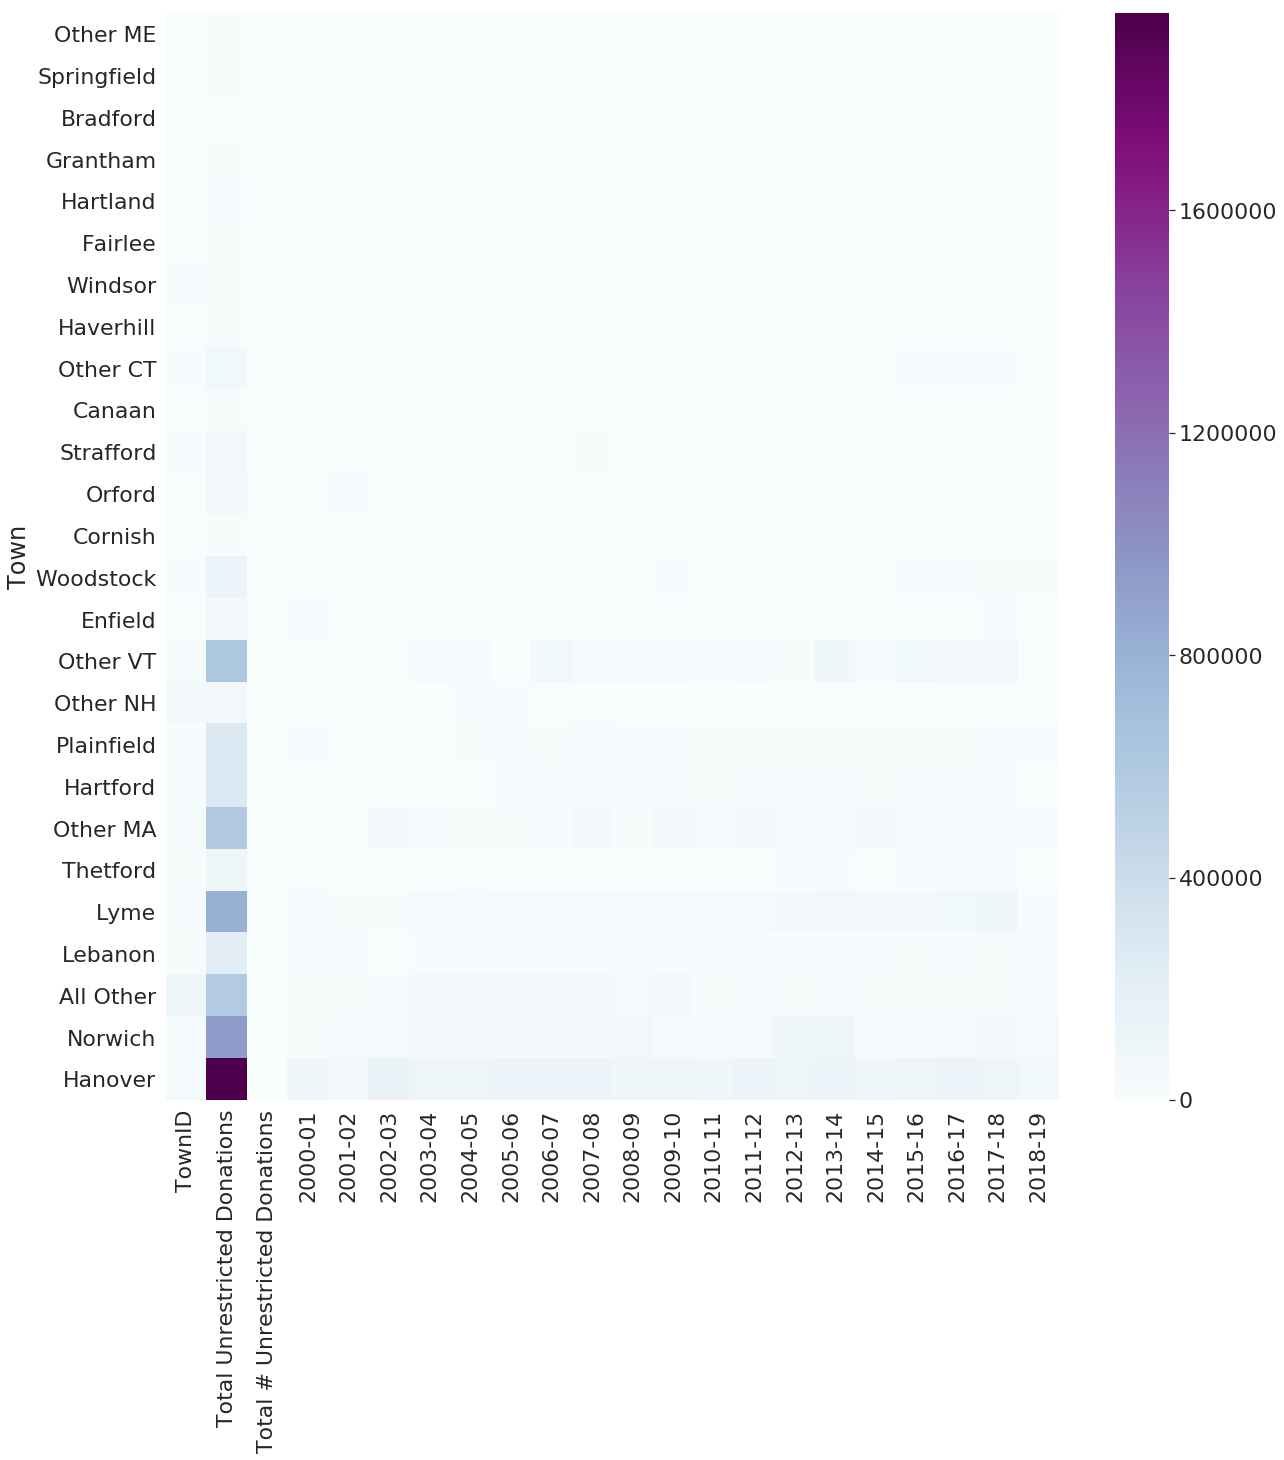

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(top_half_towns, cmap = 'BuPu')

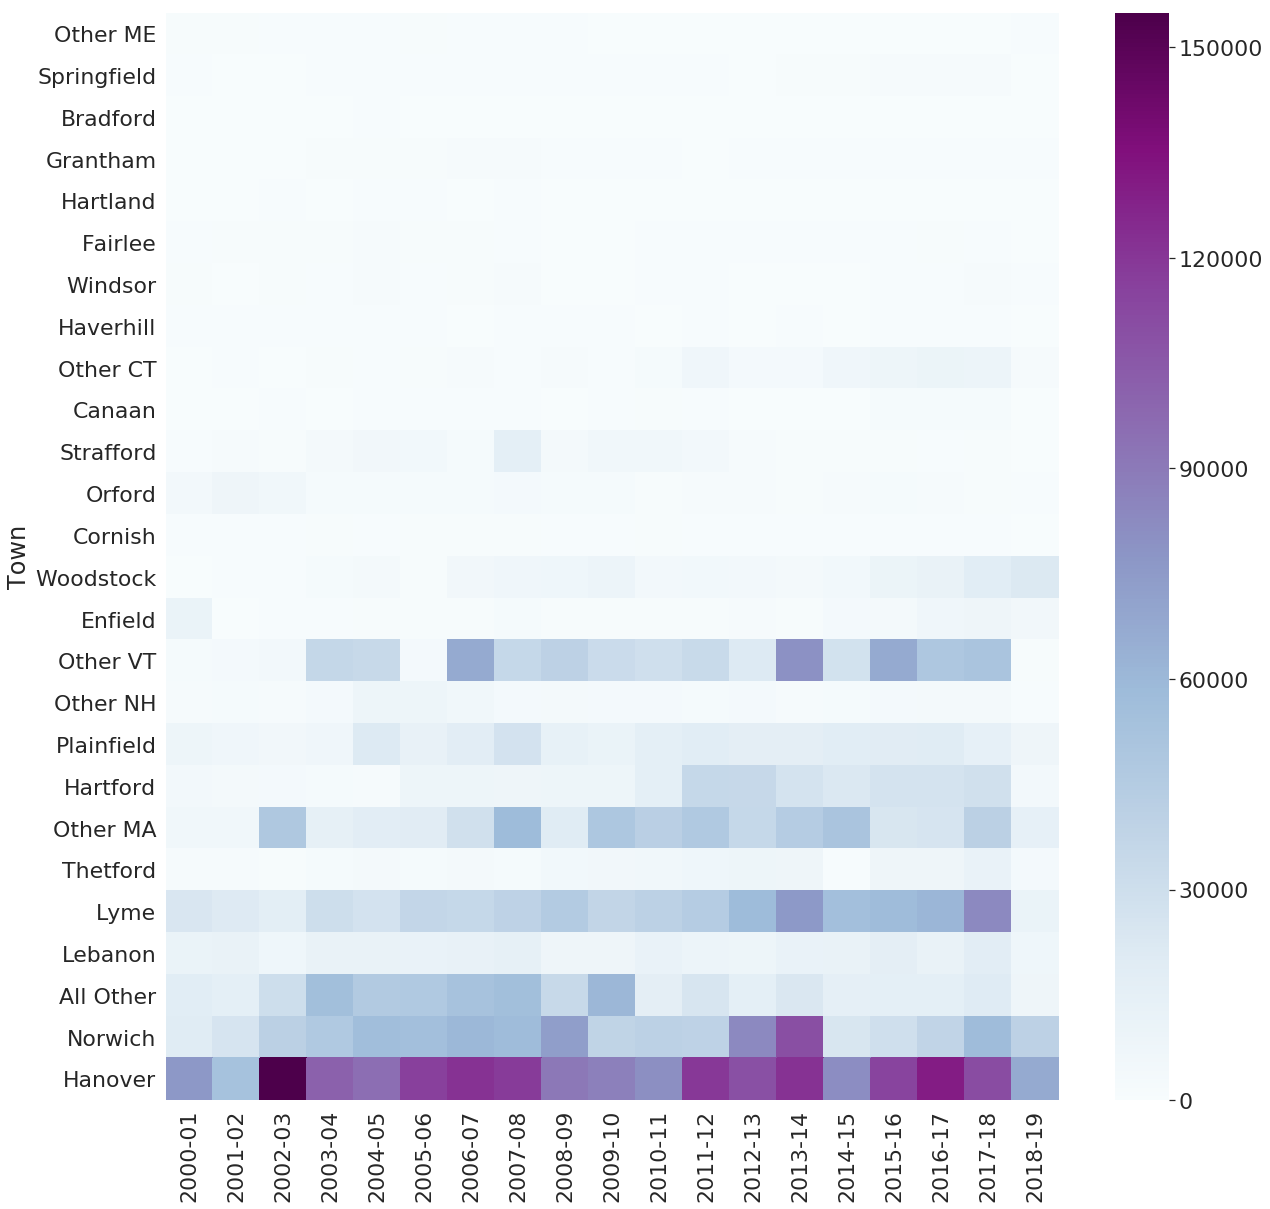

In [28]:
REAL_top_half = top_half_towns.drop(['TownID','Total Unrestricted Donations','Total # Unrestricted Donations'], axis = 1)
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(REAL_top_half, cmap = 'BuPu')